# Part II - Ford GoBike System Data Explanation
## by Khoa Pham


## Investigation Overview


> Finding the pattern usage of different type of user for better understanding their behavior on different time dimensions.


## Dataset Overview
> The dataset is included 2,407,259 records of bike trips of BayWheel Sanfrancisco in 2019. 
After enriching features, the dataset has total 20 columns. There are one main category feature, that is `user_type` (Subscriber or Customer).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
from numpy import median
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob

import warnings
warnings.filterwarnings("ignore")

# allows us to view our graphs in jupyter notebook.
%matplotlib inline  

In [2]:
# load in the dataset into a pandas dataframe
df_master = pd.read_csv('2019_Baywheels-tripdata_master.csv', index_col=False)

In [3]:
#Drop unwanted column "Unamed: 0" that is the duplicated index column. 
df_master.drop(columns = df_master.columns[0], axis=1, inplace=True)

In [4]:
df_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,time_of_day,day_of_week,day_of_month,month_of_year,quarter_of_year,is_weekend,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,229.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,17,Thursday,31,1,1,False,1347.1
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,4.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,20,Thursday,31,1,1,False,1098.3
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,245.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,18,Thursday,31,1,1,False,1043.9
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,19,Thursday,31,1,1,False,744.7
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,16.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,14,Thursday,31,1,1,False,1011.8


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  time_of_day              int64  
 14  day_of_week              object 
 15  day_of_month             int64  
 16  month_of_year            int64  
 17  quarter_of_year          int64  
 18  is_weekend               bool   
 19  duration_min             float64
dtypes: bool(1), float64(7), int64(6), object(6)
me

In [6]:
day_of_week_ranked = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_ranked_class = pd.api.types.CategoricalDtype(ordered=True, categories=day_of_week_ranked)
df_master['day_of_week'] = df_master['day_of_week'].astype(day_of_week_ranked_class);

In [7]:
# Change datatype of enriching columns to correct one
df_master['start_time'] = pd.to_datetime(df_master.start_time)
df_master['end_time'] = pd.to_datetime(df_master.end_time)
df_master['bike_id'] = df_master['bike_id'].astype('category')
df_master['user_type'] = df_master['user_type'].astype('category')
df_master['time_of_day'] = df_master['time_of_day'].astype('object')
df_master['day_of_month'] = df_master['day_of_month'].astype('object')
df_master['month_of_year'] = df_master['month_of_year'].astype('object')
df_master['quarter_of_year'] = df_master['quarter_of_year'].astype('object')

In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  category      
 12  user_type                category      
 13  time_of_day              object        
 14  day_of_week              category      
 15  day_of_month             object        
 16  month_of_year            object        
 17  quarter_of_year          ob

## Distribution of trip duration in minutes of Subscriber & Customer

Customer trip duration distribution is typically from 10 to 20 minutes that is longer than subscribers whose ride mostly is from 8 minutes to 10 minutes.

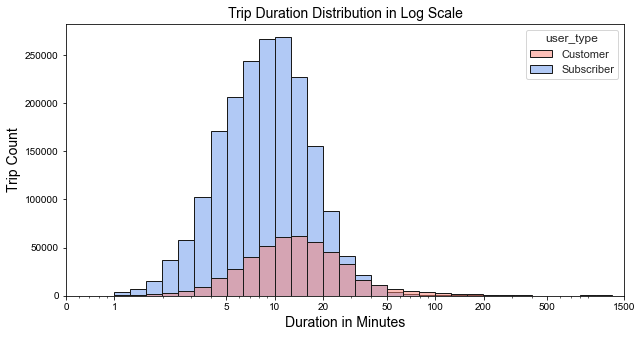

In [9]:
#Histogram of duration in minutes in log scale
f1, ax1 = plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.histplot(
    data=df_master,
    x="duration_min",
    edgecolor=".1",
    linewidth=1,
    hue='user_type',
    log_scale=True,
    bins=np.arange(0, df_master['duration_min'].max(), 0.1),
    palette= ['salmon', 'cornflowerblue'])
ax1.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax1.set_xticks([0.5, 1, 5, 10, 20, 50, 100, 200, 500, 1500])
ax1.set_title('Trip Duration Distribution in Log Scale', size=14)
ax1.set_xlabel('Duration in Minutes', size=14)
ax1.set_ylabel('Trip Count', size=14);

## The relative percentage of trip between Subscriber & Customer

There are 80.38% of the trip are taken by subscriber and customer's trip percentage is 19.62%.

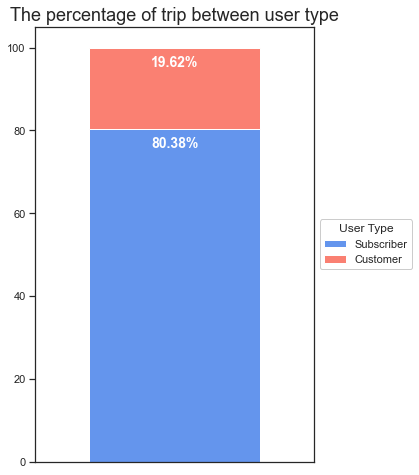

In [10]:
# Percentage of user type
user_type_relative = df_master['user_type'].value_counts(normalize=True)*100


# plt.figure(figsize = [5, 8])
# base_color = sns.color_palette()[:3]
colors = ['cornflowerblue' , 'salmon']

ax = user_type_relative.to_frame().T.plot.bar(stacked=True, color=colors, figsize = [5, 8], width=0.8)
adjust = -2

for bars in ax.patches:
    adjust += bars.get_height()
    plt.annotate(f'{bars.get_height():.2f}%',
                    (bars.get_x()+bars.get_width()/2, adjust),
                    color='white', fontsize=14, weight='bold', ha='center', va='top')

# baseline = 0.5
# for i in range(user_type_relative.shape[0]):
#     ax = plt.bar(x = 0.5, height = user_type_relative[i], bottom = baseline, color=colors[i])
#     baseline += user_type_relative[i]
#     plt.annotate(f'{user_type_relative[i]:.2f}%',
#                     (0.5, user_type_relative[:i].sum()+user_type_relative[i] ),
#                     color='white', fontsize=14, weight='bold', ha='center', va='top')
plt.legend(user_type_relative.index, title='User Type', framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);  # add a legend for labeling
plt.xticks([])

plt.title('The percentage of trip between user type', fontsize=18);

## The relative percentage of trip between weekend & weekday

There are 82.5% of the trip conducted on weekday rather than weekend.

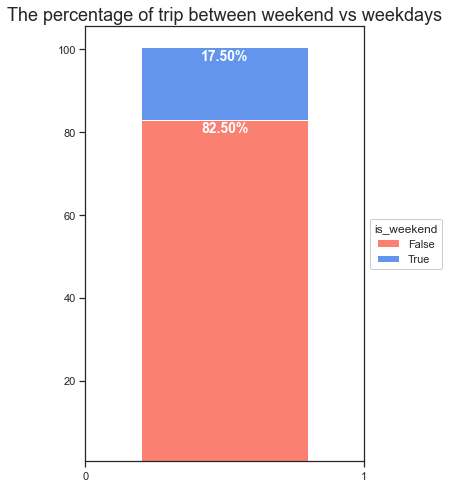

In [11]:
# Percentage of weekend vs weekday trip
sorted_counts = df_master['is_weekend'].value_counts(normalize=True)*100
plt.figure(figsize = [5, 8])
base_color = sns.color_palette()[:3]
colors = ['salmon', 'cornflowerblue']

baseline = 0.5
for i in range(sorted_counts.shape[0]):
    ax = plt.bar(x = 0.5, height = sorted_counts[i], bottom = baseline, color=colors[i], width=0.6)
    baseline += sorted_counts[i]
    plt.annotate(f'{sorted_counts[i]:.2f}%',
                    (0.5, sorted_counts[:i].sum()+sorted_counts[i] ),
                    color='white', fontsize=14, weight='bold', ha='center', va='top')

plt.xticks(np.arange(len(sorted_counts)))
plt.legend(sorted_counts.index, title='is_weekend', framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);  # add a legend for labeling

plt.title('The percentage of trip between weekend vs weekdays', fontsize=18);

## The comparison of average trip duration in minutes between Subscriber & Cusomter

The number of trips conducted by customer is smaller than subscriber, but their average trip duration (22 minutes) is double to subscriber (11 minutes).  

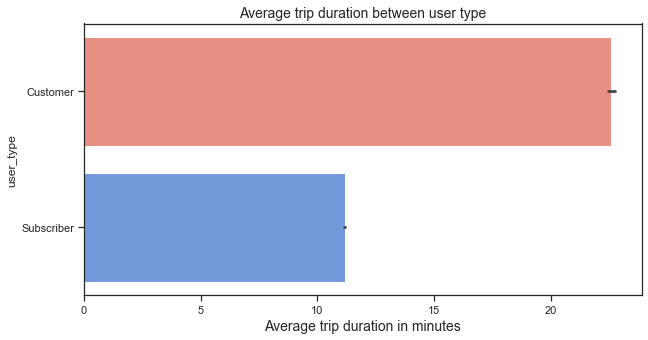

In [12]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(y=df_master['user_type'], x=df_master['duration_min'], palette= ['salmon', 'cornflowerblue'])
axes.set_title("Average trip duration between user type", size=14)
axes.set_xlabel("Average trip duration in minutes", size=14);

## The average trip duration in minutes changing over the week

The average trip duration in 2019 is 13.41 min. The number of trips on Saturday & Sunday is lower compared to other days. However, there is a big difference in the trip duration on weekends. People tend to ride longer about 4-5 minutes than weekdays.

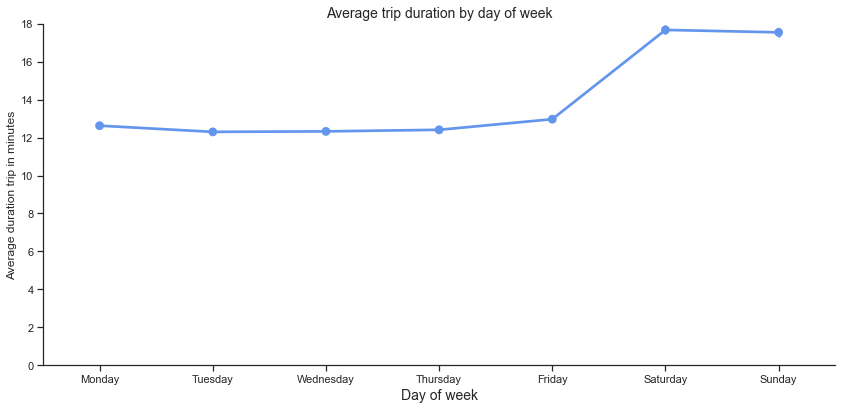

In [13]:
sns.catplot(data=df_master, 
            y="duration_min", 
            x = "day_of_week", 
            kind= "point", 
            aspect=2, 
            height=6, 
            dodge = 0.3,
            color='cornflowerblue');

plt.xlabel("Day of week", size=14)
plt.ylabel("Average duration trip in minutes")
plt.title("Average trip duration by day of week", size=14)
plt.ylim([0, 18]);
plt.tight_layout(pad=1.5);

## The trip distribution over the month between Subscriber & Customer

Overall, the subscriber contributes the greatest number of the trip over the months of 2019. However, in December, trip count's customer is higher than subscriber. This could be because of the holiday season so our regular bikers are not going to commute to work (perhaps they take annual leaves) rather than the customer could be tourists or travelers from outside of the city.

The month of using for subscriber is in March and April. After that the number of trips is dropping as coming to summertime and come back on springtime (September & October). And it significant dops on holiday season when most of office workers is taking time off from work and not commuting to work. 

On the other hand, customer starts using more bikes from September till end of the year.

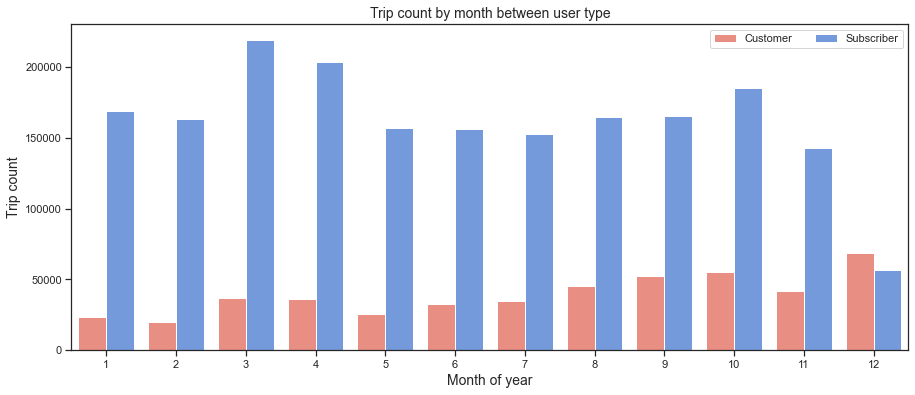

In [14]:
fig, axes = plt.subplots(figsize=(15, 6))

sns.countplot(data = df_master, x = 'month_of_year', hue = 'user_type', palette=['salmon', 'cornflowerblue'])
axes.legend(loc = 1, ncol = 2)
axes.set_title("Trip count by month between user type", size=14)
axes.set_ylabel("Trip count", size=14)
axes.set_xlabel("Month of year", size=14);

## The trip distribution over the time of day between weekend & weekday

On weekdays trips are mostly occurs on the time frame of commuting to work of office workers. As a result, most of the trip come from the subscriber. In contrast, on weekend, most of them is on daytime, so the trip absolutely come from the customer who perhaps use the bikes for explore the city or travelling to visit place for enjoyment.

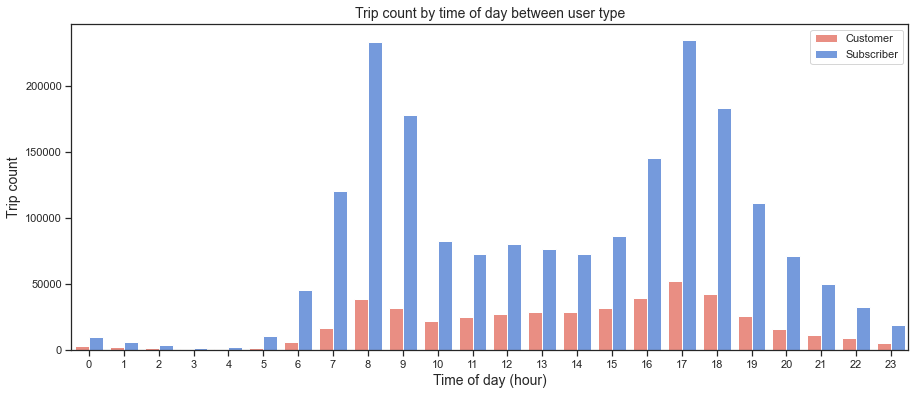

In [15]:
fig, axes = plt.subplots(figsize=(15, 6))

sns.countplot(data = df_master, x = 'time_of_day', hue = 'user_type', palette=['salmon', 'cornflowerblue'])
axes.legend(loc = 1, ncol = 1)
axes.set_title("Trip count by time of day between user type", size=14)
axes.set_ylabel("Trip count", size=14)
axes.set_xlabel("Time of day (hour)", size=14);

## The heatmap of average trip duration in minutes over the time of day & day of week of Customer & Subscriber

In overall, the customer rider has the average trip duration longer than the subscriber as stated in the color density of customer is darker for the whole-time frame of the day and 7 days of the week.
Customers focus the trip on daytime of weekends. There is some significant average trip duration of early morning that could be the fewer trip taken during that time. The focus on daytime from 10am till 6pm and on weekend to promote on weekend trip fun for the riders to getting to push the bike utilization on weekends.
For Subscriber, almost the average trip duration is the same over the time of day and 7 days of the week. This could be different behavior from customer who could the tourists or travelers to get more time on rides rather than office employees who commute to work and finish the trip as soon as possible.


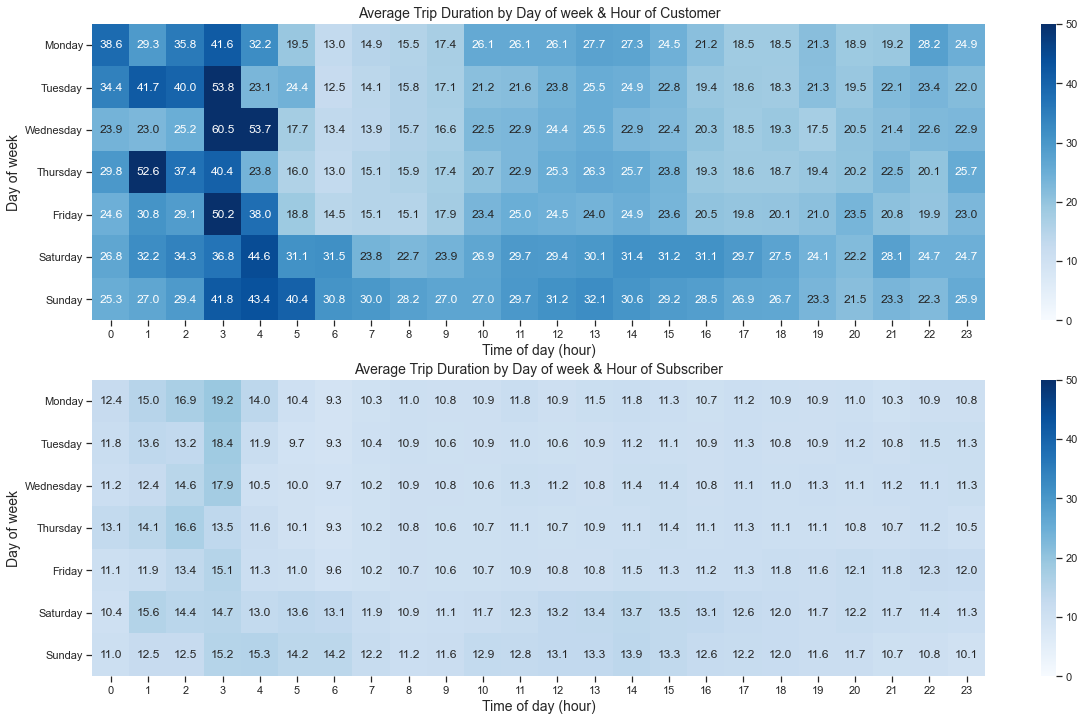

In [16]:
plt.figure(figsize=(20,12))

plt.subplot(2, 1, 1)
customers_df = df_master.query('user_type == "Customer"')
avg_duration_cust = customers_df.groupby(['day_of_week', 'time_of_day'])['duration_min'].mean()
avg_duration_cust_df = avg_duration_cust.reset_index(name='avg_druation')
avg_duration_cust_pivot = avg_duration_cust_df.pivot(index='day_of_week', columns='time_of_day', values='avg_druation')
sns.heatmap(avg_duration_cust_pivot, cmap="Blues", fmt=".1f", annot = True, robust=True, vmin = 0, vmax = 50);
plt.title('Average Trip Duration by Day of week & Hour of Customer', fontsize=14);
plt.xlabel('Time of day (hour)', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscriber_df = df_master.query('user_type == "Subscriber"')
avg_duration_subs = subscriber_df.groupby(['day_of_week', 'time_of_day'])['duration_min'].mean()
avg_duration_subs_df = avg_duration_subs.reset_index(name='avg_druation')
avg_duration_subs_pivot = avg_duration_subs_df.pivot(index='day_of_week', columns='time_of_day', values='avg_druation')
sns.heatmap(avg_duration_subs_pivot, cmap="Blues", fmt=".1f", annot = True, robust=True, vmin = 0, vmax =50);
plt.title('Average Trip Duration by Day of week & Hour of Subscriber', fontsize=14);
plt.xlabel('Time of day (hour)', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

## The heatmap of number of trip over the time of day & day of week of Customer & Subscriber

The heatmap clearly shows that customer use the bike on weekend (10am to 5pm) and weekday on 8am and it is getting denser on 5-6pm on weekdays. On the other hand, the subscriber uses the bike mostly on weekdays on 8am and 5pm. But in overall, the number of trips taken of subscriber is far higher than customer as the cooler color of customer.

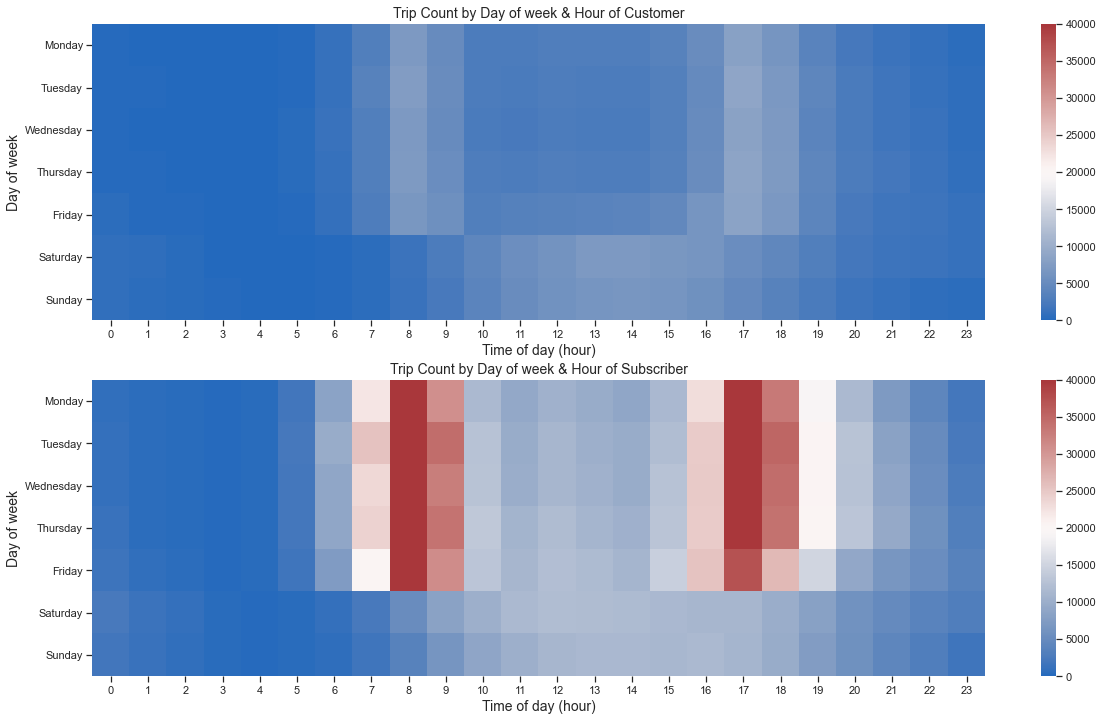

In [17]:
plt.figure(figsize=(20,12))

plt.subplot(2, 1, 1)
customers_df = df_master.query('user_type == "Customer"')
trip_count_cust = customers_df.groupby(['day_of_week', 'time_of_day']).size()
trip_count_cust_df = trip_count_cust.reset_index(name='trip_count')
trip_count_cust_pivot = trip_count_cust_df.pivot(index='day_of_week', columns='time_of_day', values='trip_count')
sns.heatmap(trip_count_cust_pivot, cmap="vlag", annot = False, robust=True, vmin = 0, vmax = 40000);
plt.title('Trip Count by Day of week & Hour of Customer', fontsize=14);
plt.xlabel('Time of day (hour)', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscriber_df = df_master.query('user_type == "Subscriber"')
trip_count_subs = subscriber_df.groupby(['day_of_week', 'time_of_day']).size()
trip_count_subs_df = trip_count_subs.reset_index(name='trip_count')
trip_count_subs_pivot = trip_count_subs_df.pivot(index='day_of_week', columns='time_of_day', values='trip_count')
sns.heatmap(trip_count_subs_pivot, cmap="vlag", annot = False, robust=True, vmin = 0, vmax = 40000);
plt.title('Trip Count by Day of week & Hour of Subscriber', fontsize=14);
plt.xlabel('Time of day (hour)', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

## The heatmap of average trip duration in minutes over the day of week & month of Customer & Subscriber

The seasonal factor has the effect on customer biker’s behavior on summertime (May, June & July) where the average trip on day of week of those months are denser from the rest of the month. This could be the season where people have the summer holiday and traveler will take the riders on those days. 
The stable average trip duration of subscriber shows clearly on the heatmap over the weeks and months. They are expected to use the bike only for going to work.
Average trip duration drops in December for both type of user.


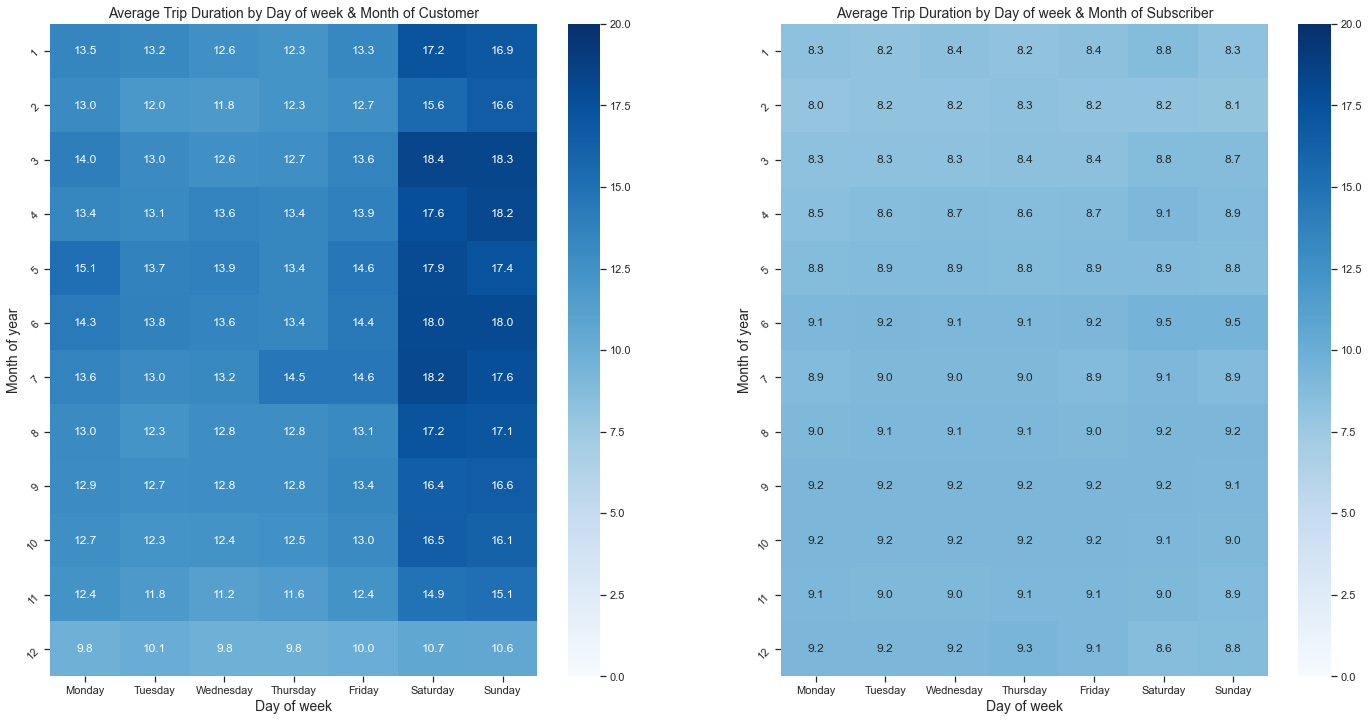

In [18]:
plt.figure(figsize=(24,12))

plt.subplot(1, 2, 1)
customers_df = df_master.query('user_type == "Customer"')
avg_duration_cust_2 = customers_df.groupby(['month_of_year', 'day_of_week'])['duration_min'].median()
avg_duration_cust_df_2 = avg_duration_cust_2.reset_index(name='avg_druation')
avg_duration_cust_pivot_2 = avg_duration_cust_df_2.pivot(index='month_of_year', columns='day_of_week', values='avg_druation')
sns.heatmap(avg_duration_cust_pivot_2, fmt=".1f", cmap="Blues", annot = True, robust=True, vmin = 0, vmax = 20);
plt.title('Average Trip Duration by Day of week & Month of Customer', fontsize=14);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Month of year', fontsize=14)
plt.yticks(rotation = 45);

plt.subplot(1, 2, 2)
subscriber_df = df_master.query('user_type == "Subscriber"')
avg_duration_subs_2 = subscriber_df.groupby(['month_of_year', 'day_of_week'])['duration_min'].median()
avg_duration_subs_df_2 = avg_duration_subs_2.reset_index(name='avg_druation')
avg_duration_subs_pivot_2 = avg_duration_subs_df_2.pivot(index='month_of_year', columns='day_of_week', values='avg_druation')
sns.heatmap(avg_duration_subs_pivot_2, fmt=".1f", cmap="Blues", annot = True, robust=True, vmin = 0, vmax = 20);
plt.title('Average Trip Duration by Day of week & Month of Subscriber', fontsize=14);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Month of year', fontsize=14)
plt.yticks(rotation = 45);

## The heatmap of number of trip over the day of week & month of Customer & Subscriber

The heatmap shows most of the trip taken over the year of subscriber is on Monday to Friday and from January to November with the peaks Fridays of March, Tuesdays of April, and Tuesdays of October and the number significant drops in December. In contrast, the customer is getting hot in December from Monday till Friday. That is a bit surprising insight that we can customize the promoting and bike utilization based on the pattern usage of user type on different time dimensions.

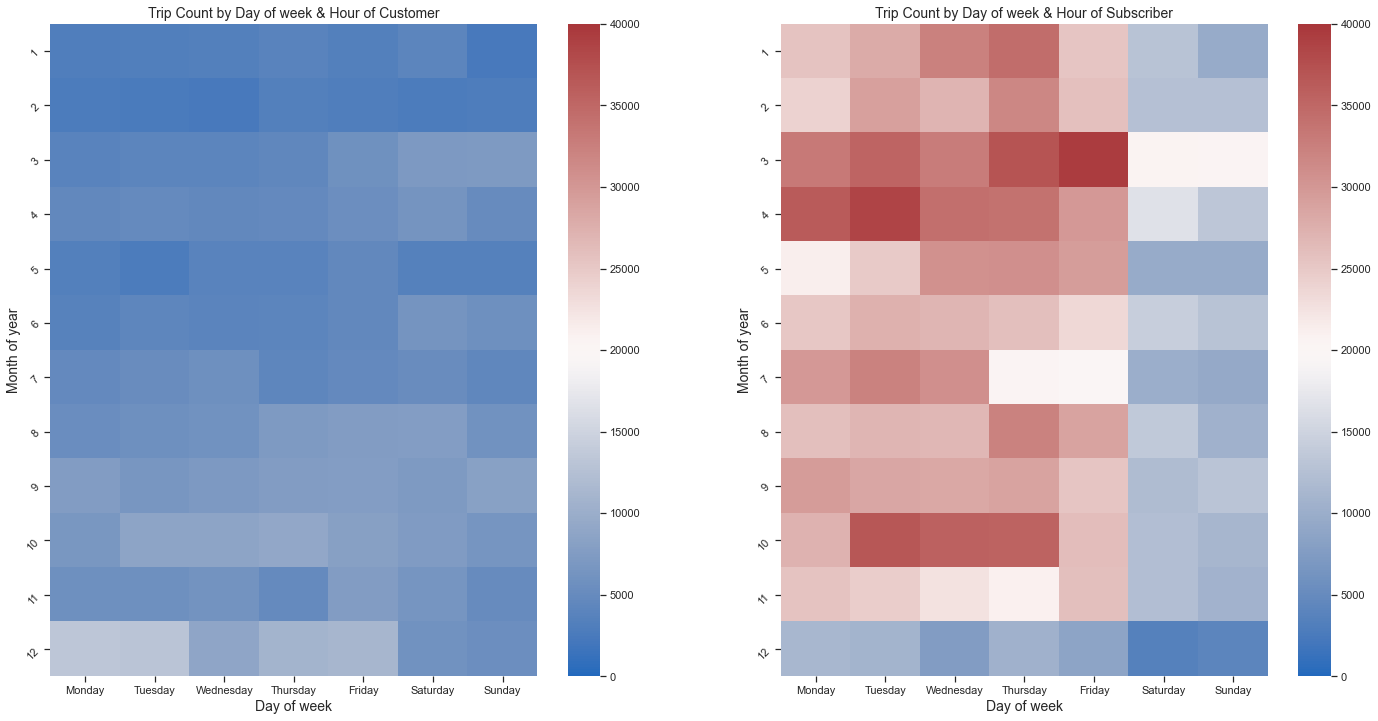

In [19]:
plt.figure(figsize=(24,12))

plt.subplot(1, 2, 1)
customers_df = df_master.query('user_type == "Customer"')
avg_duration_cust_2 = customers_df.groupby(['month_of_year', 'day_of_week']).size()
avg_duration_cust_df_2 = avg_duration_cust_2.reset_index(name='avg_druation')
avg_duration_cust_pivot_2 = avg_duration_cust_df_2.pivot(index='month_of_year', columns='day_of_week', values='avg_druation')
sns.heatmap(avg_duration_cust_pivot_2, cmap="vlag", annot = False, robust=True, vmin = 0, vmax = 40000);
plt.title('Trip Count by Day of week & Hour of Customer', fontsize=14);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Month of year', fontsize=14)
plt.yticks(rotation = 45);

plt.subplot(1, 2, 2)
subscriber_df = df_master.query('user_type == "Subscriber"')
avg_duration_subs_2 = subscriber_df.groupby(['month_of_year', 'day_of_week'])['duration_min'].size()
avg_duration_subs_df_2 = avg_duration_subs_2.reset_index(name='avg_druation')
avg_duration_subs_pivot_2 = avg_duration_subs_df_2.pivot(index='month_of_year', columns='day_of_week', values='avg_druation')
sns.heatmap(avg_duration_subs_pivot_2, cmap="vlag", annot = False, robust=True, vmin = 0, vmax = 40000);
plt.title('Trip Count by Day of week & Hour of Subscriber', fontsize=14);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Month of year', fontsize=14)
plt.yticks(rotation = 45);

In [27]:
!jupyter nbconvert "Khoa Pham_Project 5_Part II_slide deck.ipynb" --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Khoa Pham_Project 5_Part II_slide deck.ipynb to slides
[NbConvertApp] Writing 1192839 bytes to Khoa Pham_Project 5_Part II_slide deck.slides.html
